## Final Project Submission

Please fill out:
* Student name: KIGO VALERIE WAMWITHA
* Student pace: full time(Hybrid)
* Scheduled project review date/time: 6/29/2025
* Instructor name: FAITH ROTICH
* Blog post URL:


# Aviation_Data Project - Final Project
The company is expanding to new industries, to diversify its portifolio. A data scientist is to determine which aircraft is of low risk for the company to venture in and give actionable insights that the aviation division can use to decide which aircraft to purchase.

## Objectives
Will be able to deal with;

* Missing values in data
* How to aggregate data
* How to visualize and make data easily accessible

I used 31 columns for my analysis, which included variables about:
* the total fatal injuries
* the total serious injuries
* the minor serious injuries
* the event date
* the accident number

#### Task: Analyze best approach to be taken by the company in their purchase




# Business Understanding
## What is the relationship between potential risk of an aircraft and its purchasing operations for the company?
### What aircraft will meet the needs of the company?
Intuitively it may be assumed that a plane model with many casualties or number of deaths is considered not reliable.

In this analysis we are going to look into AviationData dataset that will help in determining which Aircraft will be of best purchase.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data Understanding
The data source for this analysis will be from;
### 'AviationData.csv'
* *Sources* : The data was retrieved from Kaggle
*  *Contents* : Data about the potential risk of each flight. Contains; model numbers, fatal injuries and the accidents occured.
*  *Format* : It is a csv data
## TASK
* Check missing values
* Aggregate Data
## Use of
* drop_duplicates(): to ensure no duplicated values.
* df.head(): show first rows of a dataframe.
* df.shape: to know the size of the data set.
* df.drop(columns): drop Latitude and Longitude not in use at the moment in the data frame and also contains most missing values.



In [2]:
df = pd.read_csv('AviationData.csv', encoding = 'windows-1252', low_memory = False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


* Observation: The Dataset is uniform from top to bottom.

In [4]:
df[df['Make'].isnull()|df['Model'].isnull()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
354,20020917X02286,Accident,LAX82FUA11,1982-02-19,"TORRANCE, CA",United States,NaN,NaN,TOA,TORRANCE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,19-02-1983
443,20020917X02032,Accident,FTW82DA082,1982-02-28,"TAYLOR, TX",United States,NaN,NaN,T74,TAYLOR MUNICIPAL,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,28-02-1983
461,20020917X01674,Accident,ATL82DA063,1982-03-02,"BROWNSBORO, AL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Approach,Probable Cause,02-03-1983
835,20020917X02071,Accident,FTW82DA129,1982-04-14,"CLEVELAND, TX",United States,NaN,NaN,6R3,CLEVELAND MUNICIPAL,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,14-04-1983
1637,20020917X03452,Accident,FTW82FPD13,1982-06-20,"ROANOKE, TX",United States,NaN,NaN,NaN,AERO VALLEY,...,Personal,NaN,1.0,1.0,0.0,0.0,VMC,Maneuvering,Probable Cause,20-06-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73592,20130531X43222,Incident,DCA13WA097,2013-05-22,"Panama City, Panama",Panama,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,90.0,NaN,NaN,NaN,03-11-2020
73617,20130808X52306,Incident,CEN13WA470,2013-05-26,"Geneva, Eswatini",Eswatini,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,VMC,NaN,NaN,03-11-2020
74873,20140327X61657,Accident,ERA14LA174,2014-03-26,"Patillas, PR",United States,175831N,0066115W,X64,Patillas Airport,...,Personal,Emerito Guzman,1.0,0.0,0.0,0.0,VMC,NaN,The pilot’s failure to maintain airplane contr...,25-09-2020
77653,20151222X23224,Incident,DCA16WA034,2015-12-04,"Perth, Australia",Australia,NaN,NaN,NaN,NaN,...,NaN,Scoot Air,0.0,0.0,0.0,0.0,NaN,NaN,NaN,25-09-2020


In [5]:
df.dropna(subset=['Make', 'Model'], inplace= True)

In [6]:
df[df['Make'].isnull()|df['Model'].isnull()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [7]:
missing_values = df.isna()
print("Missing values per column:")
print(missing_values[missing_values < 0])

Missing values per column:
      Event.Id Investigation.Type Accident.Number Event.Date Location Country  \
0          NaN                NaN             NaN        NaN      NaN     NaN   
1          NaN                NaN             NaN        NaN      NaN     NaN   
2          NaN                NaN             NaN        NaN      NaN     NaN   
3          NaN                NaN             NaN        NaN      NaN     NaN   
4          NaN                NaN             NaN        NaN      NaN     NaN   
...        ...                ...             ...        ...      ...     ...   
88884      NaN                NaN             NaN        NaN      NaN     NaN   
88885      NaN                NaN             NaN        NaN      NaN     NaN   
88886      NaN                NaN             NaN        NaN      NaN     NaN   
88887      NaN                NaN             NaN        NaN      NaN     NaN   
88888      NaN                NaN             NaN        NaN      NaN     NaN   



In [8]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82754.000000,77391.000000,76287.000000,76863.000000,82880.000000
mean,1.146591,0.647543,0.279812,0.357194,5.321634
std,0.446566,5.488727,1.544400,2.236761,27.913573
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
df.shape

(88777, 31)

* Observation : data has 88889 records and 29 columns

## Requirements
### 1. Most used Aircraft
Alphabetically sorted list of  mst used plane Make and Models
### 2. Associating total fatal injuries to the Models and Make
### 3. Associating make and model to weather
### 4. find outliers
presumably checking which models can withstand the weather
### 5. Analysis of AviationData


# Most-Least used Aircraft
* In the cells below we get the most and least used aircraft, using (.astype(str)) we are telling the code to ensure all values in Make and Model are treated as strings.
* Also use of value_counts allows finding frequency, that is the most used.
* Ascending = True, is used to ensure ascending value is given to show least used.


In [10]:
df['Aircraft']= df['Make'].astype(str) + " " + df['Model'].astype(str)
most_used_aircraft = df['Aircraft'].value_counts().head(10)
print(most_used_aircraft)

Aircraft
Cessna 152         2168
Cessna 172         1254
Cessna 172N         996
Piper PA-28-140     812
Cessna 150          716
Cessna 172M         667
Cessna 172P         597
Piper PA-18         539
Cessna 150M         539
Piper PA-28-161     502
Name: count, dtype: int64


In [11]:
df['Aircraft']= df['Make'].astype(str) + " " + df['Model'].astype(str)
least_used_aircraft = df['Aircraft'].value_counts(ascending= True).head(10)
print(least_used_aircraft)

Aircraft
Pzl-bielsko SZD-42-2 JANTAR            1
Slingsby Swallow Type T.45             1
Kearney Pulsar XP                      1
Schrack Starduster Too                 1
American Air Racing Thunder Mustang    1
Jones Challenger II                    1
Furey Kitfox IV                        1
Ekornaas, Fred SkyRanger II Kit        1
Rose Peregrine                         1
Cessna 172 Skyhawk                     1
Name: count, dtype: int64


# Associating Model, Make,and Total.Fatal and Total.Serious Injuries
* Allows comparison of all three (Make, Model and fatal injuries) to show which aircraft would be considered safe and which ones would not be considered as safe for the company to purchase,as it would have a potential risk.


In [12]:
# Use loc to tell pandas to modify the specific columns and not a temporary column.
# coerce is used to replace blanks or missing values with Nan.
# reset index is used to reset the grouped make and model.

df_subset = df[['Model', 'Make','Country', 'Total.Fatal.Injuries']]
df_subset.loc[:, 'Total.Fatal.Injuries'] = pd.to_numeric(df_subset['Total.Fatal.Injuries'],errors= 'coerce')
fatal_injuries =df_subset.groupby(['Model', 'Make', 'Country'])['Total.Fatal.Injuries'].sum().reset_index()
fatal_injuries = fatal_injuries.sort_values(by= 'Total.Fatal.Injuries', ascending= False)
print(fatal_injuries)

             Model               Make        Country  Total.Fatal.Injuries
4112       747-168             Boeing          India                 349.0
22158       TU-154            Tupolev          India                 349.0
726           172N             Cessna  United States                 348.0
451            152             Cessna  United States                 335.0
16118    PA-28-181              Piper  United States                 325.0
...            ...                ...            ...                   ...
9721        DC9-30            Douglas  United States                   0.0
9720        DC9-14            Douglas         Mexico                   0.0
9719           DC9  Mcdonnell Douglas  United States                   0.0
9718           DC9            Douglas         Mexico                   0.0
11848  GLODE SWIFT              Temco  United States                   0.0

[23696 rows x 4 columns]


In [13]:
# Use loc to tell pandas to modify the specific columns and not a temporary column

df_subset = df[['Model', 'Make','Country', 'Total.Serious.Injuries']]
df_subset.loc[:, 'Total.Serious.Injuries'] = pd.to_numeric(df_subset['Total.Serious.Injuries'],errors= 'coerce')
serious_injuries =df_subset.groupby(['Model', 'Make', 'Country'])['Total.Serious.Injuries'].sum().reset_index()
serious_injuries = serious_injuries.sort_values(by= 'Total.Serious.Injuries', ascending= False)
print(serious_injuries)

              Model              Make        Country  Total.Serious.Injuries
16061     PA-28-140             Piper  United States                   216.0
608             172            Cessna  United States                   186.0
451             152            Cessna  United States                   166.0
3792            737            BOEING         Turkey                   164.0
726            172N            Cessna  United States                   145.0
...             ...               ...            ...                     ...
9208        Cavalon   CSP Leasing LLC  United States                     0.0
9207        Cavalon          Autogyro  United States                     0.0
9203   Cartercopter     Cartercopters  United States                     0.0
9202   CarterCopter  Cartercopter Llc  United States                     0.0
23695       unknown           Unknown  United States                     0.0

[23696 rows x 4 columns]


## Observation :
* Boeing has the highest number of fatal accidents and Piper has the highest number of serious accidents.

# Least Fatal Injuries
* Observation: The cell below will show the Aircraft that has least Fatal.Injuries, as shown Champion is considered to have least Fatal and serious injuries

In [14]:
# Use loc to tell pandas to modify the specific columns and not a temporary column

df_subset = df[['Model', 'Make', 'Total.Fatal.Injuries']]
df_subset.loc[:, 'Total.Fatal.Injuries'] = pd.to_numeric(df_subset['Total.Fatal.Injuries'],errors= 'coerce')
least_fatal =df_subset.groupby(['Model', 'Make'])['Total.Fatal.Injuries'].sum().reset_index()
least_fatal = least_fatal.sort_values(by= 'Total.Fatal.Injuries', ascending= True)
print(least_fatal)

           Model               Make  Total.Fatal.Injuries
0          &GCBC           Champion                   0.0
12032      MD-80  Mcdonnell Douglas                   0.0
12033      MD-81             Boeing                   0.0
12034      MD-81  MCDONNELL DOUGLAS                   0.0
12035      MD-81  Mcdonnell Douglas                   0.0
...          ...                ...                   ...
3504        A321             AIRBUS                 381.0
12038      MD-82             Boeing                 403.0
2866   777 - 206             BOEING                 534.0
2543     737-200             Boeing                 906.0
2506         737             BOEING                1348.0

[20136 rows x 3 columns]


In [15]:
# Use loc to tell pandas to modify the specific columns and not a temporary column

df_subset = df[['Model', 'Make', 'Total.Serious.Injuries']]
df_subset.loc[:, 'Total.Serious.Injuries'] = pd.to_numeric(df_subset['Total.Serious.Injuries'],errors= 'coerce')
least_serious=df_subset.groupby(['Model', 'Make'])['Total.Serious.Injuries'].sum().reset_index()
least_serious = least_serious.sort_values(by= 'Total.Serious.Injuries', ascending= True)
print(least_serious)

           Model        Make  Total.Serious.Injuries
0          &GCBC    Champion                     0.0
12355  MU-2B-35J  Mitsubishi                     0.0
12357  MU-2B-36A  Mitsubishi                     0.0
12358   MU-2B-40  Mitsubishi                     0.0
12359    MU-2B-6  Mitsubishi                     0.0
...          ...         ...                     ...
514         172N      Cessna                   150.0
357          152      Cessna                   168.0
446          172      Cessna                   192.0
13437  PA-28-140       Piper                   219.0
2506         737      BOEING                   380.0

[20136 rows x 3 columns]


### Observation
* Aircraft with the least accidents in both fatal and serious injuries is Champion.

# Total Injuries
* calculate all total injuries and compare to Make and Model


In [16]:
df['Total.Fatal.Injuries']= pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
df['Total.Serious.Injuries']= pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')
df['Total.Minor.Injuries']= pd.to_numeric(df['Total.Minor.Injuries'], errors='coerce')
df['total_injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

all_injuries=df.groupby(['Model', 'Make'])['total_injuries'].sum().reset_index()
all_injuries = all_injuries.sort_values(by= 'total_injuries', ascending= True)
print(all_injuries)



                 Model          Make  total_injuries
0                &GCBC      Champion             0.0
10856           KitFox         Potts             0.0
10857         KitFox 4  Richard Rank             0.0
10858        KitFox IV         Clark             0.0
10859  KitFox Series 5         Harms             0.0
...                ...           ...             ...
446                172        Cessna           640.0
514               172N        Cessna           684.0
13437        PA-28-140         Piper           725.0
357                152        Cessna           808.0
2506               737        BOEING          1804.0

[20136 rows x 3 columns]


### Observation
* Champion has the least minor,serious and fatal injuries

In [17]:
# checking for investigation type in each make and model
all_accidents=df.groupby(['Model', 'Make'])['Investigation.Type'].sum().reset_index()
all_accidents= all_accidents.sort_values(by= 'Investigation.Type', ascending= True)
print(all_accidents)

              Model               Make  \
0             &GCBC           Champion   
12595  Murphy Rebel            Colburn   
12596  Murphy Rebel            Hickman   
12597  Murphy Rebel              Jeska   
12598  Murphy Rebel             Larson   
...             ...                ...   
2661        747-123             Boeing   
7482        DC-9-51            Douglas   
7485        DC-9-51  Mcdonnell Douglas   
3429       A300-600   Airbus Industrie   
3424           A300             AIRBUS   

                                      Investigation.Type  
0                                               Accident  
12595                                           Accident  
12596                                           Accident  
12597                                           Accident  
12598                                           Accident  
...                                                  ...  
2661   IncidentIncidentIncidentIncidentIncidentIncide...  
7482   IncidentIncident

# VISUALIZATIONS

In [18]:
df['Total.Fatal.Injuries']= pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
df['Total.Serious.Injuries']= pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')
df['Total.Minor.Injuries']= pd.to_numeric(df['Total.Minor.Injuries'], errors='coerce')
df['total_injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

total_injuries= df['total_injuries'].sum()
print(total_injuries)

78818.0


## Most used Aircraft
* The most used Aircraft is Cessna.

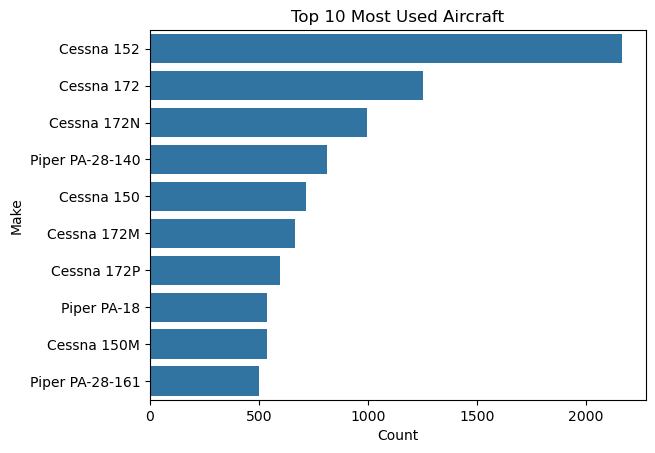

In [19]:

sns.barplot (x=most_used_aircraft.values, y= most_used_aircraft.index)
plt.xlabel('Count')
plt.ylabel('Make')
plt.title('Top 10 Most Used Aircraft')
plt.savefig('images/Most_Used_Aircraft.png')
plt.show()

# Total Aircraft Injury Per year
* 1996 had the highest Injury

<function matplotlib.pyplot.show(close=None, block=None)>

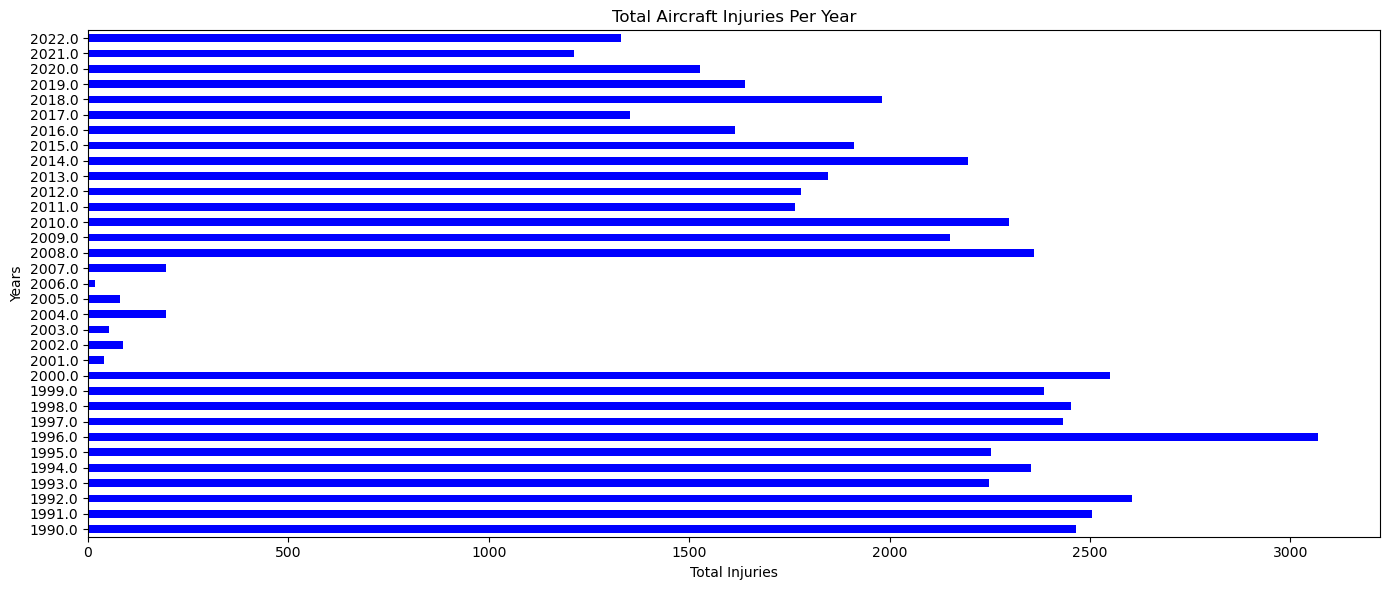

In [32]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Years'] = df['Event.Date'].dt.year
df_filtered= df[(df['Years'] >= 1990) & (df['Years'] <= 2022)]
injuries_by_year=df.groupby(df_filtered['Years'])['total_injuries'].sum().dropna()

plt.figure(figsize=(14,6))
injuries_by_year.plot(kind='barh', color= 'blue')
plt.title('Total Aircraft Injuries Per Year')
plt.xlabel('Total Injuries')
plt.ylabel('Years')
plt.savefig('images/Total_Aircraft_Injuries.png')
plt.tight_layout()
plt.show

## Boeing Aircraft Injuries Per Year (1990–2022)

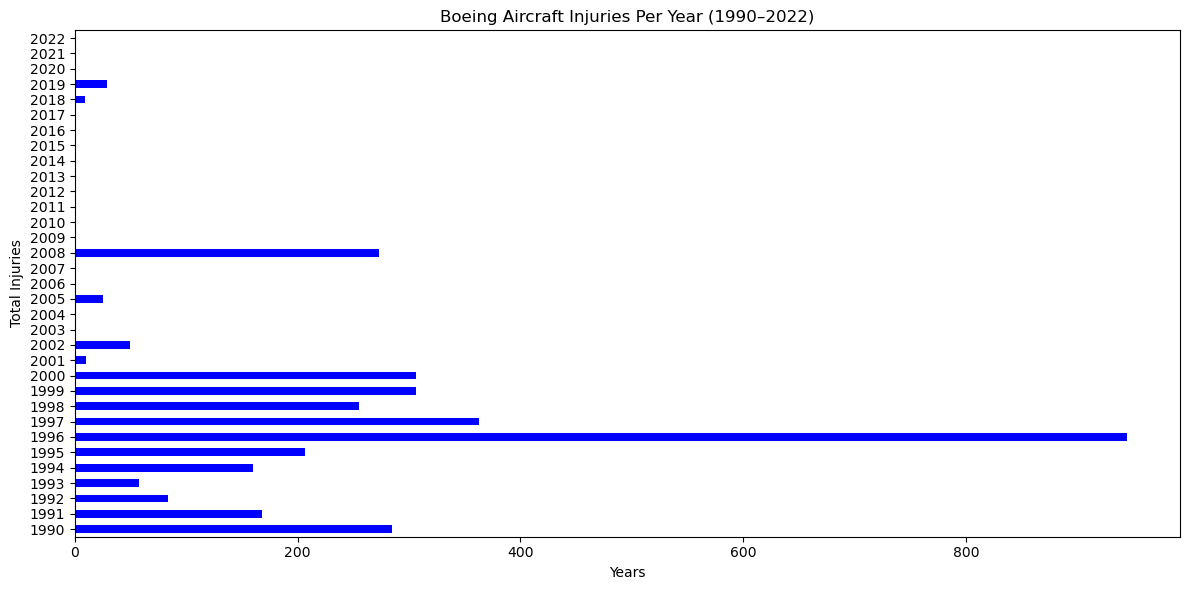

In [21]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Years'] = df['Event.Date'].dt.year
df_filtered= df[(df['Years'] >= 1990) & (df['Years'] <= 2022)]

pivot = df_filtered.pivot_table(index='Years', columns='Make', values='total_injuries', aggfunc='sum').fillna(0)
plt.figure(figsize=(12, 6))
pivot['Boeing'].plot(kind='barh', color='blue')
plt.title('Boeing Aircraft Injuries Per Year (1990–2022)')
plt.xlabel('Years')
plt.ylabel('Total Injuries')
plt.tight_layout()
plt.show()

## Top 10 Locations By Total Injuries Fatal + Serious + Mionr

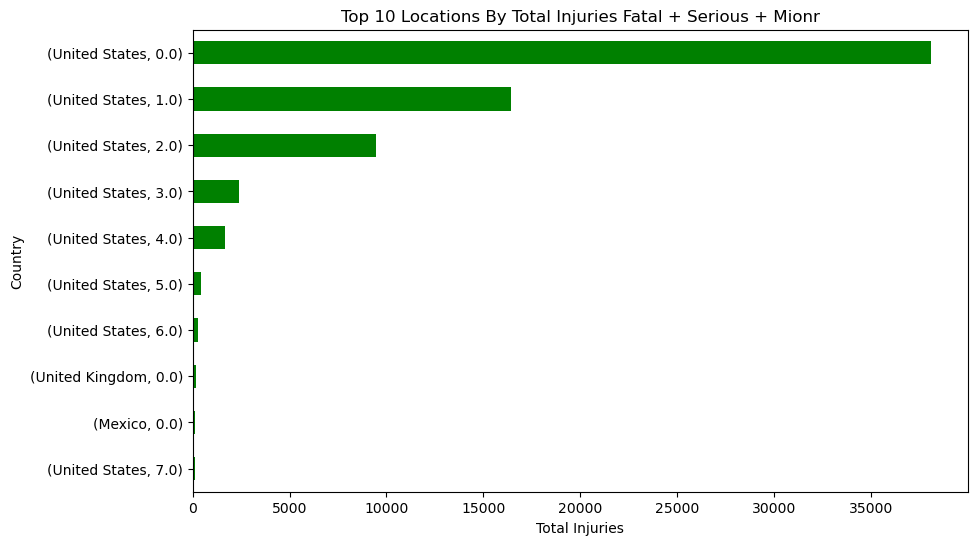

In [22]:

injuries_by_country= df.groupby('Country')['total_injuries'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
injuries_by_country.plot(kind='barh', color= 'green')
plt.title("Top 10 Locations By Total Injuries Fatal + Serious + Mionr")
plt.xlabel('Total Injuries')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

## Top 5 Aircraft Models – Injuries Per Year

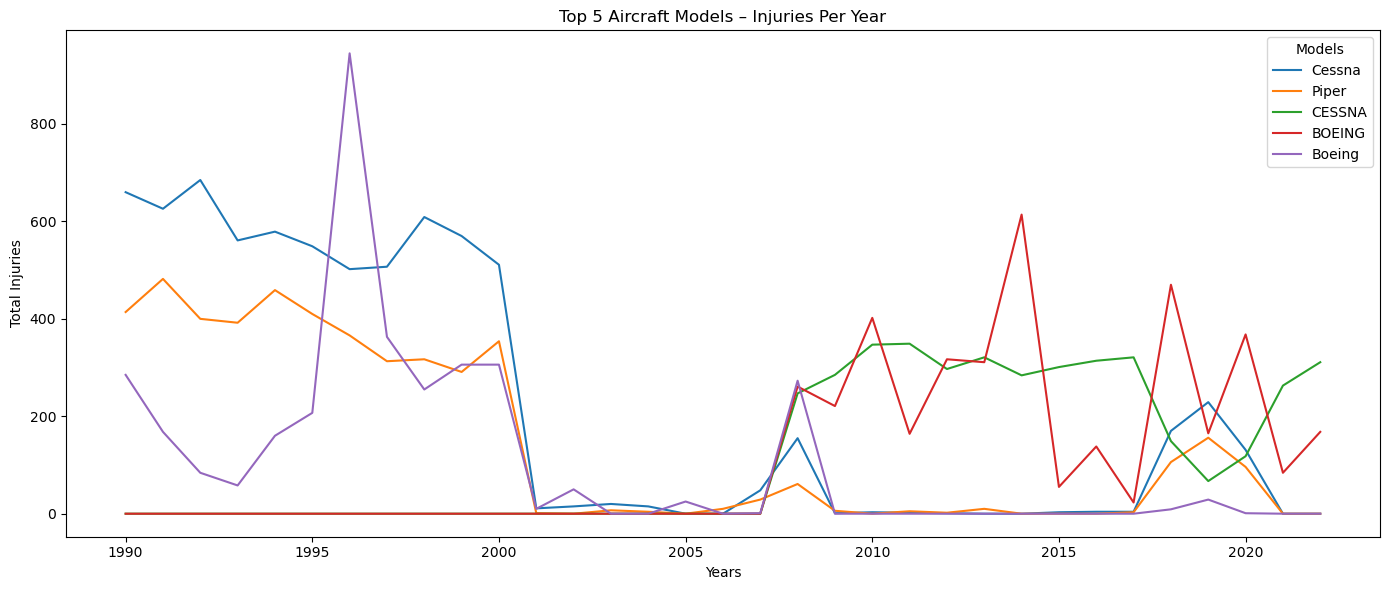

In [23]:
top_models = pivot.sum().sort_values(ascending=False).head(5).index  

pivot[top_models].plot(kind='line', figsize=(14, 6)) 
plt.title('Top 5 Aircraft Models – Injuries Per Year')
plt.xlabel('Years')
plt.ylabel('Total Injuries')
plt.legend(title='Models')
plt.tight_layout()
plt.show()

## Top 5 Aircraft Make – Injuries Per Year

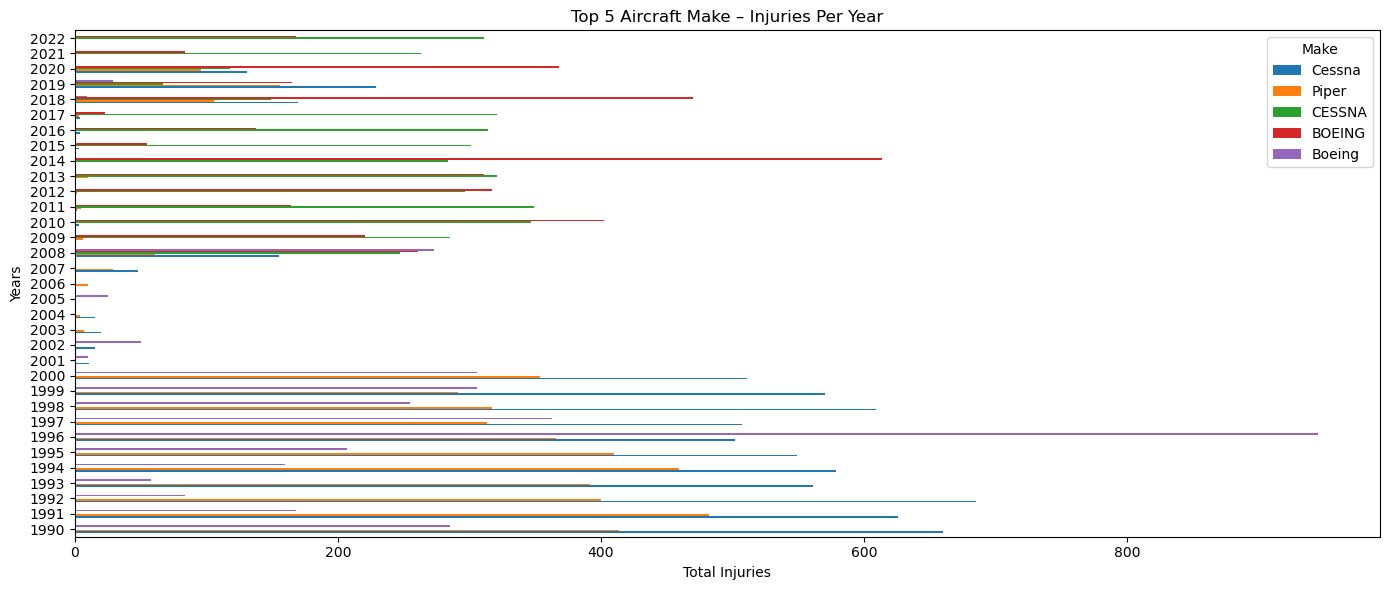

In [24]:
top_makes = pivot.sum().sort_values(ascending=False).head(5).index

pivot[top_makes].plot(kind='barh', figsize=(14, 6)) 
plt.title('Top 5 Aircraft Make – Injuries Per Year')
plt.xlabel('Total Injuries')
plt.ylabel('Years')
plt.legend(title='Make')
plt.tight_layout()
plt.show()


## Injury Distribution

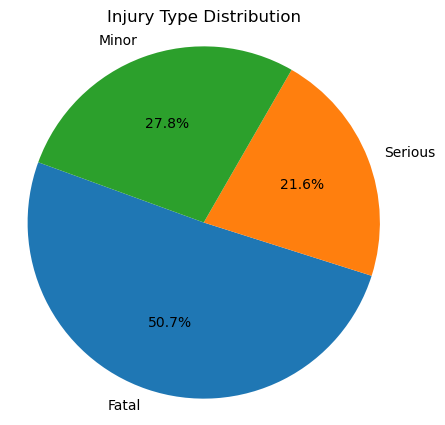

In [25]:
#Define injury type totals
total_injuries ={
    'Fatal': df['Total.Fatal.Injuries'].sum(),
    'Serious': df['Total.Serious.Injuries'].sum(),
    'Minor': df['Total.Minor.Injuries'].sum()
} 


plt.figure(figsize=(5,5))
plt.pie(total_injuries.values(), labels= total_injuries.keys(), autopct= '%1.1f%%',startangle=160)
plt.title('Injury Type Distribution')
plt.axis('equal')
plt.show()

## Number of Accidents by Aircraft Category

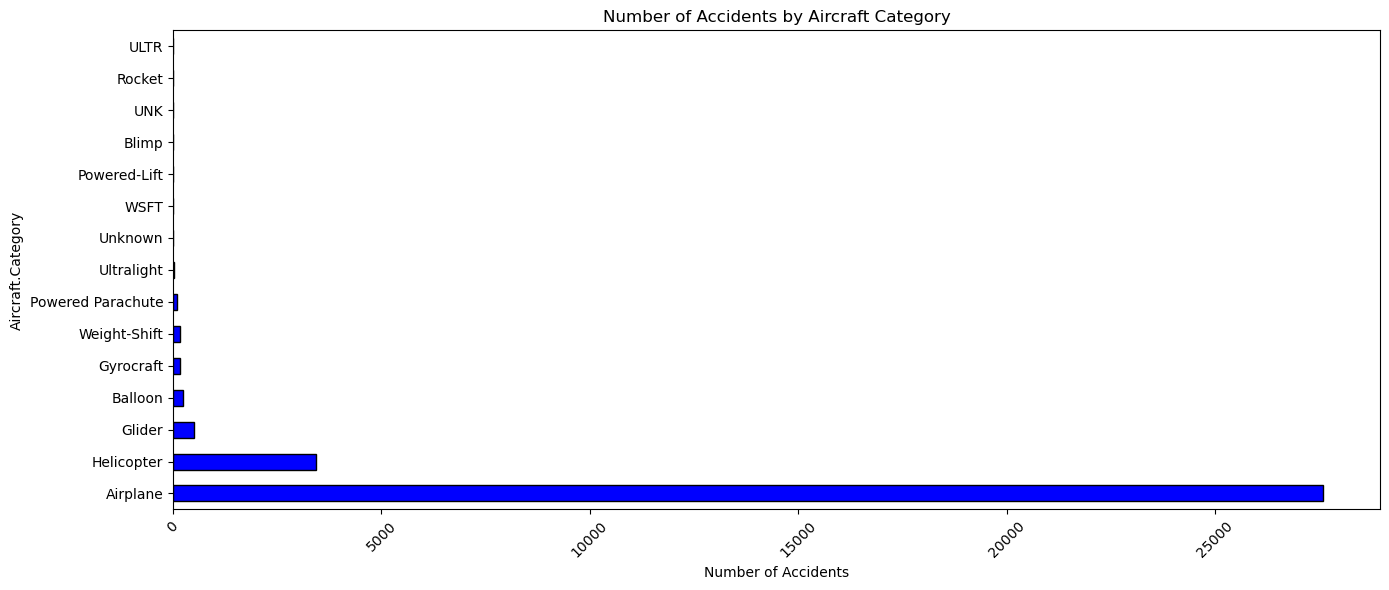

In [26]:
categry_counts= df['Aircraft.Category'].dropna().value_counts()

plt.figure(figsize=(14,6))
categry_counts.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Number of Accidents by Aircraft Category')
plt.xlabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Purpose of Flight in Accidents

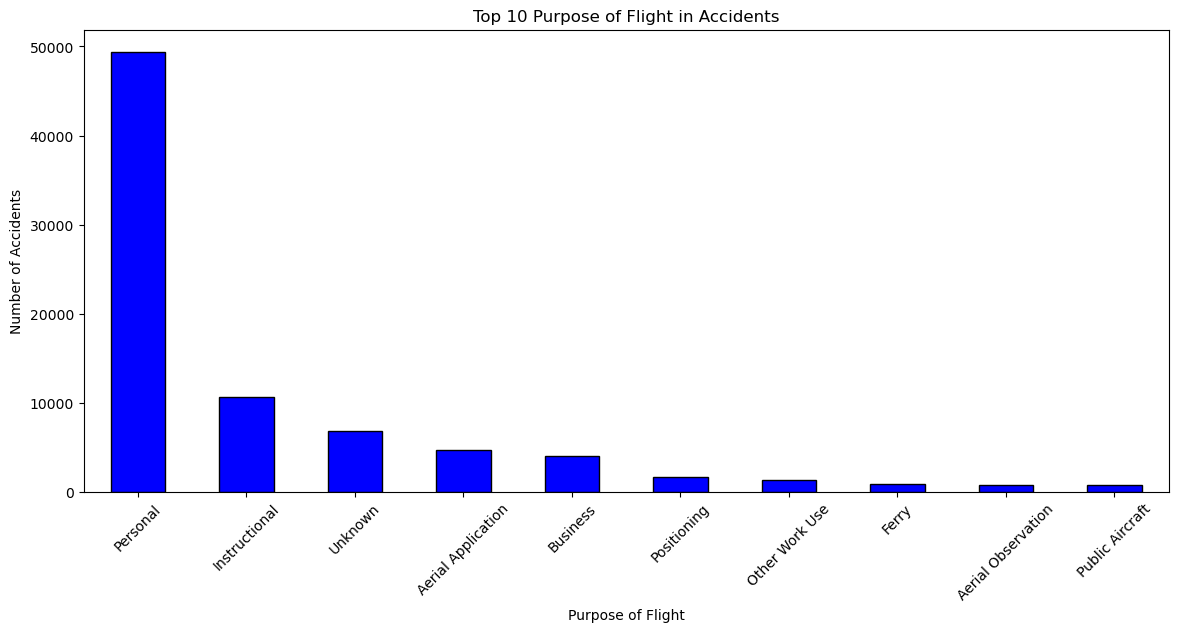

In [27]:
purpose_counts = df['Purpose.of.flight'].dropna().value_counts().head(10)
plt.figure(figsize=(14,6))
purpose_counts.plot(kind='bar', color = 'blue', edgecolor='black')
plt.title('Top 10 Purpose of Flight in Accidents')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Accident vs Incident Distribution

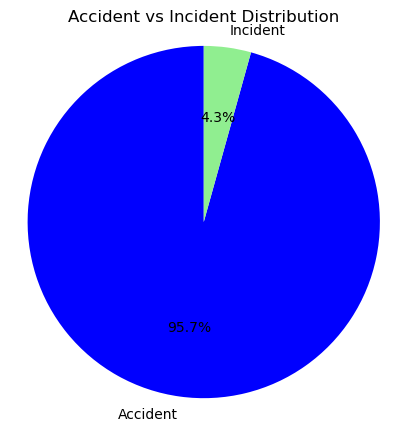

In [28]:
investigation_counts = df['Investigation.Type'].dropna().value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    investigation_counts.values,
    labels = investigation_counts.index,
    autopct = '%1.1f%%',
    startangle=90,
    colors=['blue', 'lightgreen']
)
plt.title('Accident vs Incident Distribution')
plt.axis('equal')
plt.show()

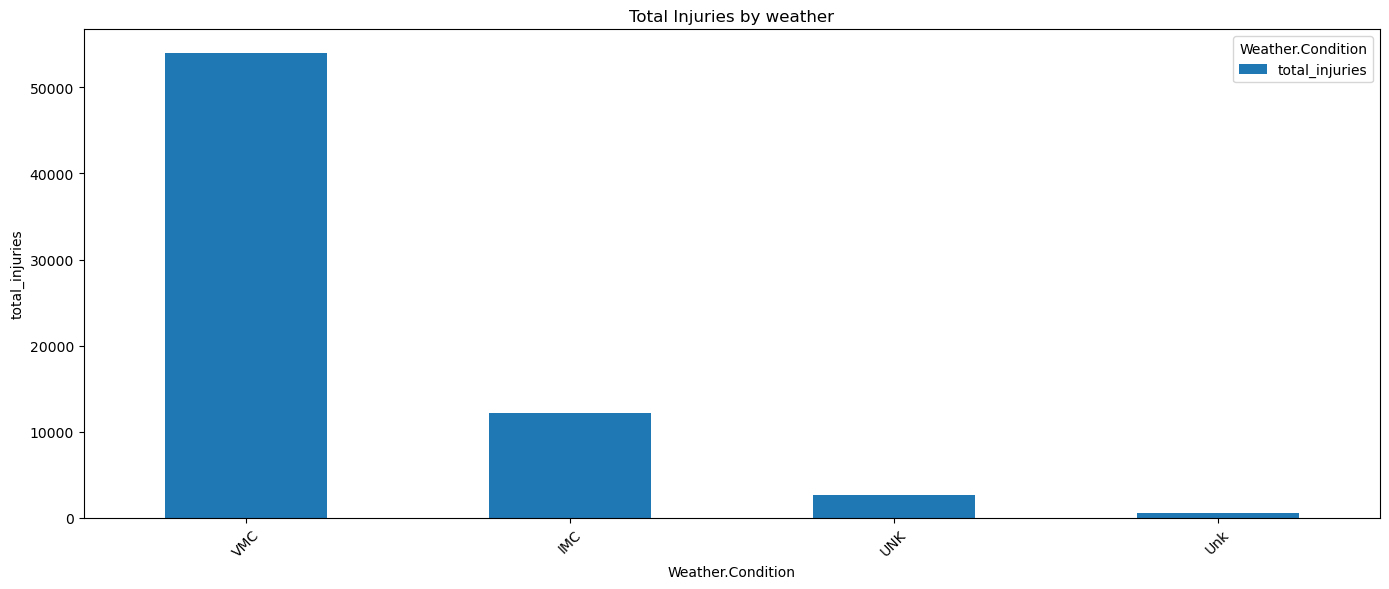

In [29]:
injuries_by_weather= df.groupby('Weather.Condition')['total_injuries'].sum().sort_values(ascending= False)
injuries_by_weather.plot(kind = 'bar', figsize=(14,6))
plt.title('Total Injuries by weather')
plt.xlabel('Weather.Condition')
plt.ylabel('total_injuries')
plt.xticks(rotation=45)
plt.legend(title= 'Weather.Condition')
plt.tight_layout()
plt.show()

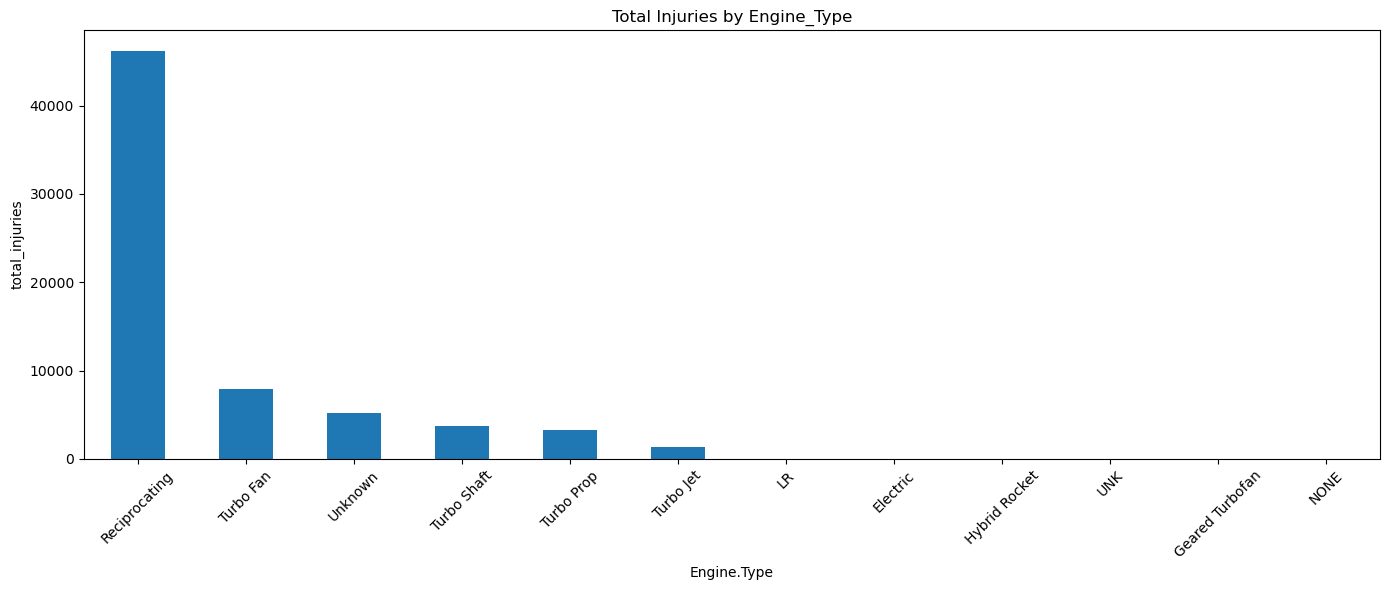

In [30]:
injuries_by_engine= df.groupby('Engine.Type')['total_injuries'].sum().sort_values(ascending= False)
injuries_by_engine.plot(kind = 'bar', figsize=(14,6))
plt.title('Total Injuries by Engine_Type')
plt.xlabel('Engine.Type')
plt.ylabel('total_injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

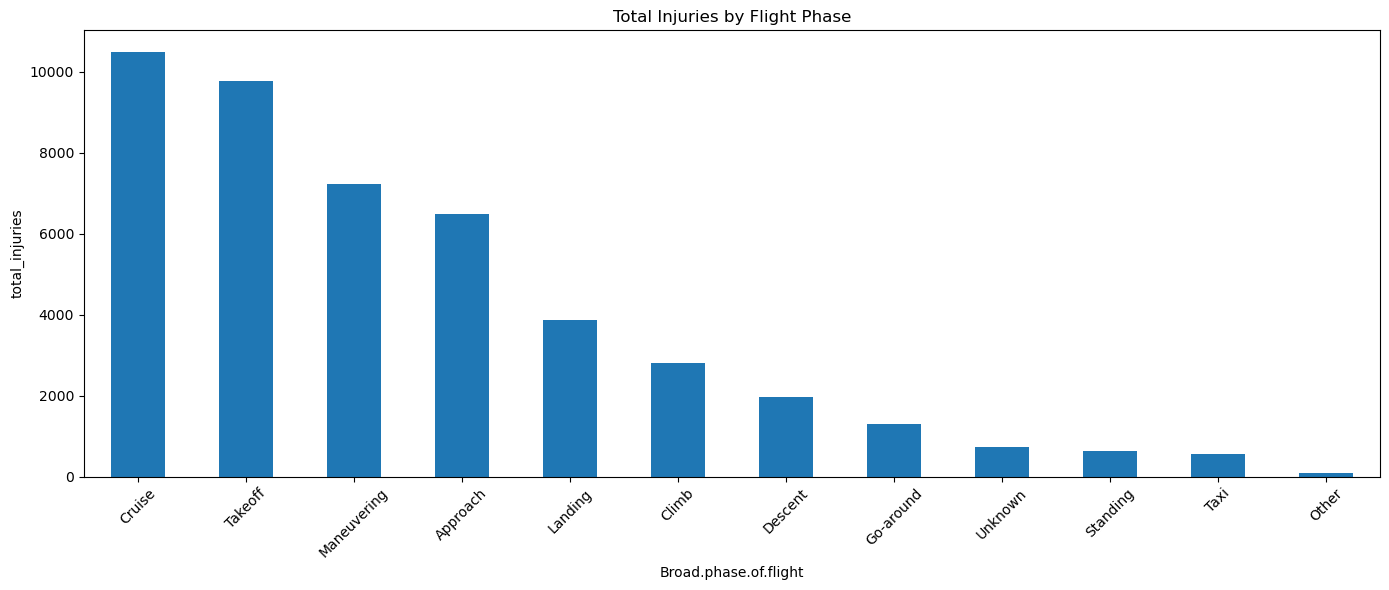

In [31]:
injuries_by_phase= df.groupby('Broad.phase.of.flight')['total_injuries'].sum().sort_values(ascending= False)
injuries_by_phase.plot(kind = 'bar', figsize=(14,6))
plt.title('Total Injuries by Flight Phase')
plt.xlabel('Broad.phase.of.flight')
plt.ylabel('total_injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()